<class 'numpy.ndarray'>
(800, 1890, 3)


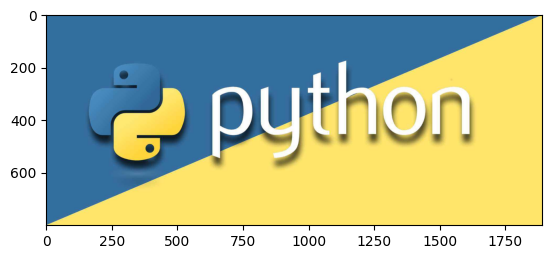

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # 图像处理基础库

img = plt.imread("python.jpg") #读入图像
print(type(img))  # ndarray
print(img.shape)  # 输出图像的大小，其中3代表RGB通道
plt.imshow(img)#显示图像
plt.show()#与上一句一起显示图像
plt.imsave("python-copy.jpg", img)  # 将数组写入图像


In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # 图像处理基础库
#0轴为高 1轴为宽 2轴为rgb 图像
black = np.zeros([400, 400, 3])
plt.imshow(black)
plt.show()
white = np.full([100, 100, 3], 255)
plt.imshow(white)
plt.show()
grey = np.ones([100, 100, 3])  # 注意小数模式，1.0代表255
plt.imshow(grey / 2)
plt.show()
green = np.full((100, 100, 3), 1)#产生都是1的数组
green[:] = [0, 255, 0]   # 广播 换取每个点为0 255 0
plt.imshow(green)
plt.show()
red = np.full([100, 100, 3], 0) + np.array([255, 0, 0])
plt.imshow(red)
plt.show()

img = plt.imread("python.jpg")
plt.imshow(img[:, :, [1, 2, 0]])  # 颜色互换 0为r 1为g 2为b


(800, 1890, 3)
(800, 1890)


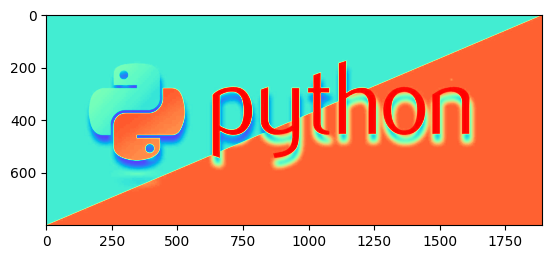

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # 图像处理基础库
# 色彩转黑白 L = R * 299 / 1000 + G * 587 / 1000 + B * 114 / 1000
img = plt.imread("python.jpg")
print(img.shape)  # 3通道
black_white = np.dot(img, [0.299, 0.587, 0.114])  # 矩阵和向量相乘可以理解为对位相乘再相加 点乘
print(black_white.shape)  # 单通道 消灭颜色维度
plt.imshow(black_white, cmap="rainbow")  # 伪彩色，可以更改颜色图如hot 配色图
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# 简单算法：使用平均值代替整个最低维
img = plt.imread("python.jpg")
x = np.mean(img, axis=2)  # 试试 max和min？rgb图像算平均值
plt.imshow(x, cmap="gray")
plt.show()
x = np.max(img, axis=2)  # 试试 max和min？
plt.imshow(x, cmap="gray")
plt.show()
x = np.min(img, axis=2)  # 试试 max和min？
plt.imshow(x, cmap="gray")
plt.show()


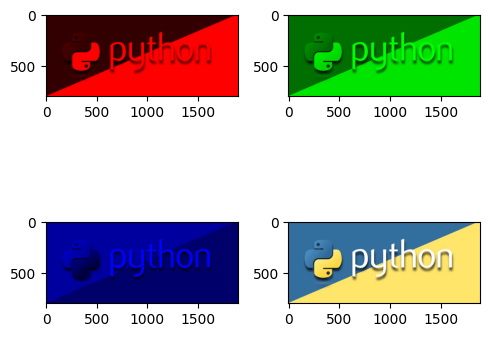

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 提取单个颜色通道
img = plt.imread("python.jpg")
red = img.copy()
green = img.copy()
blue = img.copy()
# 提取红色通道
red[:, :, [1, 2]] = 0
# 提取绿色通道
green[:, :, [0, 2]] = 0
# 提取蓝色通道
blue[:, :, [0, 1]] = 0
fig, ax = plt.subplots(2, 2) #同时放四个图
fig.set_size_inches(5, 5)  # 画布大小
ax[0, 0].imshow(red)
ax[0, 1].imshow(green)
ax[1, 0].imshow(blue)
ax[1, 1].imshow(img)
plt.tight_layout()  # 自动调整间距

(800, 1890, 3)
(800, 5670, 3)
(1600, 1890, 3)
(2400, 3780, 3)


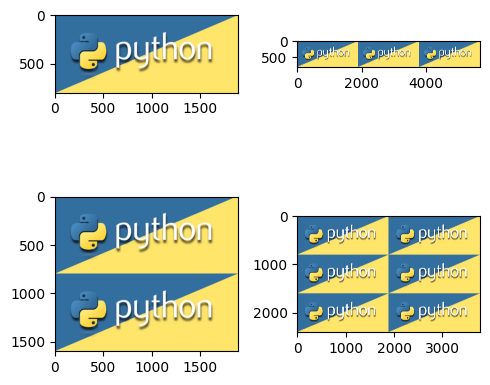

In [2]:
import numpy as np
import matplotlib.pyplot as plt
img = plt.imread("python.jpg")
# 将图像沿着水平方向重复三次。
print(img.shape)
a = np.concatenate((img, img, img), axis=1)
print(a.shape)
# 将图像沿着垂直方向重复两次
b = np.concatenate((img, img), axis=0)
print(b.shape)
# 将图像沿着水平方向重复两次，垂直重复三次。
c = np.concatenate((img, img), axis=1)
c = np.concatenate((c, c, c), axis=0)
print(c.shape)
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(5, 5)  # 画布大小
ax[0, 0].imshow(img)
ax[0, 1].imshow(a)
ax[1, 0].imshow(b)
ax[1, 1].imshow(c)
plt.tight_layout()  # 自动调整间距


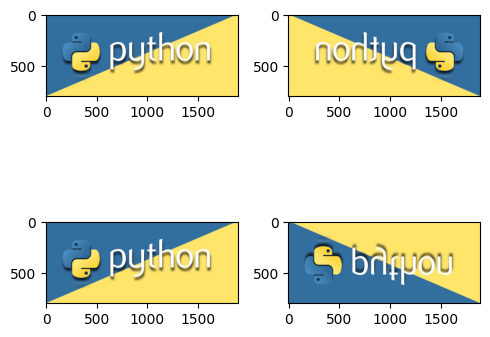

In [3]:
import numpy as np
import matplotlib.pyplot as plt
img = plt.imread("python.jpg")
a = img.copy()
b = img.copy()
# 将图像水平镜面转换。（只需要将列进行颠倒，行不变）
a = a[:, ::-1]
#  将图像垂直镜面转换。（只需要将行进行颠倒，列不变）
b = b[::-1, :]
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(5, 5)  # 画布大小
ax[0, 0].imshow(img)
ax[0, 1].imshow(a)
ax[1, 0].imshow(img)
ax[1, 1].imshow(b)
plt.tight_layout()  # 自动调整间距

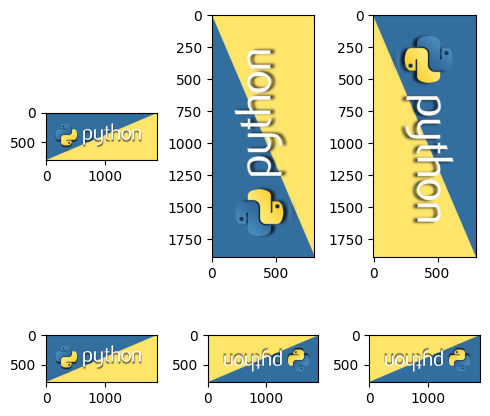

In [4]:
import numpy as np
import matplotlib.pyplot as plt
img = plt.imread("python.jpg")
a = img.copy()
b = img.copy()
c = img.copy()
d = img.copy()

# 将图像向左旋转90 (转置后头还在原位置，所以还得垂直颠倒)
# 注意不能直接转置，我们只转置【高，宽，像素】中的高和宽，转成【宽，高，像素】而不是【像素，宽，高】
a = a.swapaxes(0, 1)
a = a[::-1, :]
#  将图像向右旋转90(转置后头还在原位置，所以还得水平颠倒)
b = b.swapaxes(0, 1)
b = b[:, ::-1]
# 将图像向左旋转180 ==向右旋转180(将图像分别进行水平和垂直颠倒，先哪个都行)
c = c[::-1, :]
c = c[:, ::-1]
#  将图像向右旋转180
d = d[:, ::-1]
d = d[::-1, :]
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(5, 5)  # 画布大小
ax[0, 0].imshow(img)
ax[0, 1].imshow(a)
ax[0, 2].imshow(b)
ax[1, 0].imshow(img)
ax[1, 1].imshow(c)
ax[1, 2].imshow(d)
plt.tight_layout()  # 自动调整间距


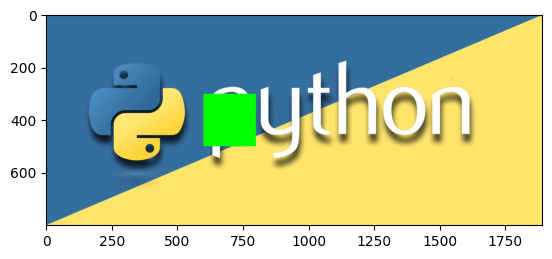

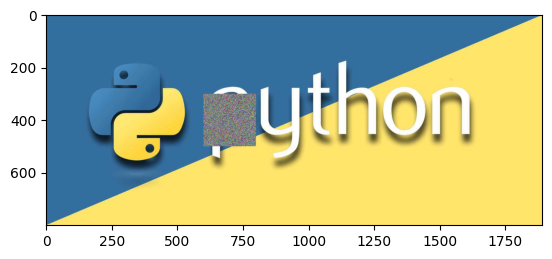

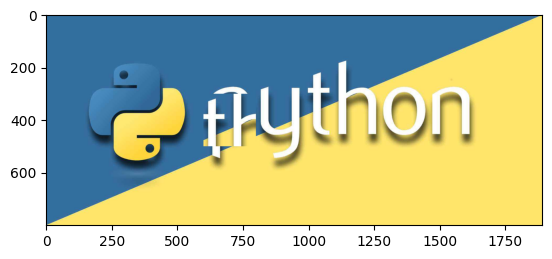

In [5]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread("python.jpg")
# 在指定的区域使用特定的纯色去遮挡图像。
a = img.copy()
a[300:500, 600:800] = [0, 255, 0]#把指定位置绿色挡住
plt.imshow(a)
plt.show()

c = img.copy()
d = np.random.randint(0, 255, (200, 200, 3))
c[300:500, 600:800] = d
plt.imshow(c)
plt.show()


img2 = plt.imread("python.jpg")
d = img.copy()
k = img2[200:400, 1000:1200]
d[300:500, 600:800] = k
plt.imshow(d)
plt.show()

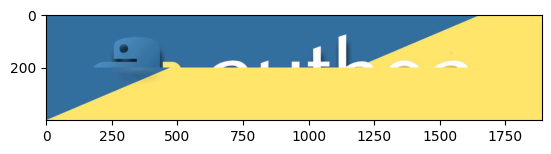

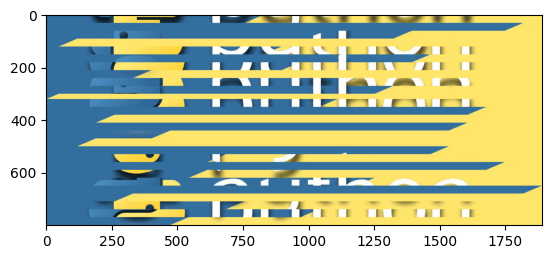

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# 图像切割组合
img = plt.imread("python.jpg")

t = img.copy()
t = np.concatenate((t[100:300, :, :], t[600:800, :, :]), axis=0)#合并
plt.imshow(t)
plt.show()

t = img.copy()
height = t.shape[0]
# 对数据进行切分
li = np.split(t, range(0, height, 30), axis=0)
# 洗牌
np.random.shuffle(li)  # 就地修改
# 合并
t = np.concatenate(li, axis=0)#合并
plt.imshow(t)
plt.show()
